# Limpeza dos dados

### Descrição do processo

In [1]:
# bibliotecas usadas para análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
% matplotlib inline

In [2]:
# funções personalizadas para manipulação dos dados
from data_modules import data_manipulation_functions as dm
from data_modules import data_plot_functions as pf
from data_modules import data_table_format as tab

In [3]:
# carregamento dos dados
data_titanic_raw = pd.read_csv('./titanic-data-6.csv')

# primeiros 5 registros do conjunto
data_titanic_raw.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Preparação dos dados
Após verificar linhas e colunas da tabela, serão feitos ajustes para deixar os dados mais legíveis e concistentes de modo a preservar a informação:

In [4]:
# 1. remoção da coluna PassengerId
# esse coluna será descatada porque não possui informações consideradas relevantes para a análise
data_titanic = data_titanic_raw.drop(columns=['PassengerId'])

In [5]:
# 2. ajuste da legibilidade do cabeçalho
# termos utilizados foram ajustados no idioma original para deixar mais descritivas as colunas 
raw_header = data_titanic.columns
new_header = ['survived', 'ticket_class', 'name', 'gender', 'age',
              'siblings_or_spouses', 'parents_or_children', 'ticket_number','fare',
              'cabin_number', 'embarkation_city']
header = dict(zip(raw_header, new_header))
data_titanic.rename(columns=header, inplace=True)

In [6]:
# 3. ajuste de valores
get_columns_with_values = dm.get_data_by_condition_from(data_titanic)

# não há linhas duplicadas
data_titanic.duplicated().any()

# 'age', 'cabin_number', 'embarkation_city' possuem dados nulos
get_columns_with_values('null', 'extract_column_names')

['age', 'cabin_number', 'embarkation_city']

/Users/Tiago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Tiago/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Tiago/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


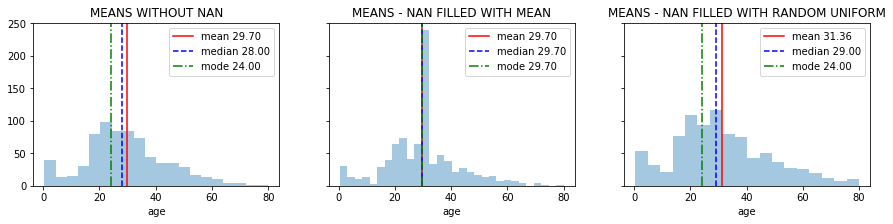

In [7]:
# 3.1. ajuste coluna age
# essa coluna tem cerca de 20% da amostra com valores NaN
# comparando preencher os dados NaN com a média das idades ou com valores random entre maior/menor valores,
# optou-se por preencher pela estratégia randômica para inteferir menos da distruição como um todo

# --------------------------------------------------
# conjunto de dados para gerar distribuições
# --------------------------------------------------
data_titanic_ages_null = data_titanic.query('age.isnull()', engine='python')['age']
data_titanic_ages_null.shape # 177

# dados apenas com valores válidos
data_titanic_valid_ages = data_titanic.query('age.notnull()', engine='python')['age']

# dados com nulos preenchidos com média
df_titanic_ages_nan_mean = data_titanic['age'].fillna(data_titanic['age'].mean())

age_min, age_max = data_titanic['age'].min(), data_titanic['age'].max()
ages_to_replace_null_reference = np.random.uniform(age_min, age_max, size=data_titanic_ages_null.shape)

# valores gerados pelo random foram copiados e colados para evitar 
# mudanças devida alguma atualização dessa célula que geraria outros números randômicos
ages_to_replace_null = [20.90931717, 62.13529179, 59.64040575, 12.02488446, 69.41204392, 61.24202836, 41.44933962,
                        10.3519298 , 50.76510719, 46.79992031, 20.09347534, 63.07128158, 55.87974807, 26.48084528,
                        26.29833389, 74.33062884, 30.06171315, 20.06074292, 0.67866898, 55.77450149, 43.8747529, 
                        26.24643849, 17.07880883, 17.61871374, 7.74908789, 39.99897263, 74.26286149, 10.80354165, 
                        52.27410117, 76.87587001, 22.01354655, 1.49411825, 50.40733695, 66.54701743, 55.34054513,
                        74.71321378, 5.25920319, 38.49321556, 65.44311878, 44.8540443, 3.11558581, 71.01147459, 
                        66.45021309, 32.78638544, 38.06492085, 19.33696868, 76.97043417,  2.61430917, 77.14175515, 
                        48.21320985, 71.70778291, 64.3371818, 25.55485401, 34.70767785, 11.12520803, 4.08390278,
                        5.45671369, 74.14639767, 19.37978725, 12.30581713,13.17495576, 56.22337203, 50.23990028,
                        76.3119208, 14.14174557, 8.06574175, 61.41956351, 20.49666319, 46.07275802, 78.26326336,
                        53.34291235, 27.00447996, 48.51083118, 7.92562105,  3.89618346, 62.86036329, 1.56955051, 
                        52.1759369, 72.28272872, 22.20834428, 16.63525525, 47.5165373,  8.91606123, 18.88227844, 
                        12.4487666, 33.56788634, 6.58207188, 75.81323994,  2.61378813, 62.1974029, 8.05424188, 
                        49.78472697, 64.98693829, 7.90728644, 29.08444469, 10.74244298, 42.05763065, 46.96726314, 
                        33.1789131, 54.25548294, 15.87982563, 40.14112005, 61.96118333, 77.55642527, 31.78330007,
                        18.8056585, 62.56353226, 13.20402122, 75.65677189, 62.70643253, 66.37757126, 15.15237538, 
                        19.09705288, 33.35795617, 52.71780435, 40.5940233, 32.31375557, 23.83276452, 16.36828367, 
                        67.40823125, 50.15360949, 36.6618675 , 29.83593501, 18.63284763, 68.89769054, 65.45982414,
                        66.01895508, 57.74152344, 57.61205451, 55.45430852, 12.84551707, 43.3619279, 20.66171068,
                        28.35221179, 47.16580338, 35.48411795, 10.72288254, 56.36542421, 9.78340453, 66.84079431,                        
                        36.83831179, 4.03227386, 27.73853637, 62.18638439, 79.98017521, 78.12216046, 11.16849522,
                        32.63622032, 14.58262641, 32.56117493, 42.16151503, 59.14912867, 4.75910659, 51.67200825, 
                        21.74230813, 57.0004401, 2.45499948, 19.3833269, 2.36740462, 8.12756607, 44.01963051, 
                        37.6868932, 0.44974649, 19.80264642, 46.45770521, 17.25289881, 26.72635083, 44.45051282,
                        52.34606051, 68.52679216, 54.44085061, 49.86389433, 37.36184953, 70.43390175, 20.90678597,
                        35.54738141, 31.0820056]

# substitui série data_titanic_ages_null pelos valores randômicos 
# os valores estão no type float ajustados para 2 casas decimais do mesmo modo que a amostra
data_titanic_ages_null.iloc[:] = [float(round(age, 1)) for age in ages_to_replace_null]

# dados com nulos preenchidos com random uniform
df_titanic_ages_nan_uniform_random = data_titanic_valid_ages.append(data_titanic_ages_null)

# --------------------------------------------------
# comparações entre distribuições
# --------------------------------------------------
figure_ages, ax_ages = plt.subplots(1,3, sharex='col', sharey='row', figsize=(15,3))

# distribuição apenas com valores válidos
pf.plot_distribution_with_means(data_titanic_valid_ages, ax=ax_ages[0], title='means without NaN')

# distribuição com nulos preenchidos com média
pf.plot_distribution_with_means(df_titanic_ages_nan_mean, ax=ax_ages[1], title='means - NaN filled with mean')

# distribuição com nulos preenchidos com random uniform
pf.plot_distribution_with_means(df_titanic_ages_nan_uniform_random, ax=ax_ages[2], title='means - NaN filled with random uniform')

figure_ages.show()
# --------------------------------------------------

# substitui valores NaN por valores randômicos uniforme
data_titanic['age'].fillna(value=data_titanic_ages_null, inplace=True)

In [8]:
# 3.2. ajuste coluna cabin
# essa coluna apresenta apenas 204 válidos
# isso representa 9,18% do total de pessoas abordo e também
# não seria possível saber quais pessoas estavam na mesma cabine
# para esta análise essa variável foi descartada
data_titanic.query('cabin_number.notnull()', engine='python')['cabin_number'].shape
cabin_percentage = dm.get_percent_of(204, 2224)
data_titanic.drop(columns='cabin_number', inplace=True)
data_titanic.head(2)

,survived,ticket_class,name,gender,age,siblings_or_spouses,parents_or_children,ticket_number,fare,embarkation_city
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [9]:
# 3.3. ajuste coluna embarkation_city
# ajustes de conteúdo para deixar valors da coluna mais legíveis
embarkation_city_nulls = data_titanic.query('embarkation_city.isnull()', engine='python')['embarkation_city'].shape

embarkation_cities = {'s':'Southampton', 'c': 'Cherbourg', 'q': 'Queestown'}
data_titanic['embarkation_city'].fillna('not_provided', inplace=True)

adjust_city_name = dm.adjust_column_by(embarkation_cities, to_lower=False)

data_titanic['embarkation_city'] = data_titanic['embarkation_city'].apply(adjust_city_name)
data_titanic['embarkation_city'].unique()

array(['Southampton', 'Cherbourg', 'Queestown', 'not_provided'],
      dtype=object)

In [10]:
# 3.4. ajuste coluna suvived
# ajustes de conteúdo para deixar valors da coluna mais legíveis
suvived_labels = {1:'yes', 0: 'no'}
adjust_suvived_labels = dm.adjust_column_by(suvived_labels)

data_titanic['survived'] = data_titanic['survived'].apply(adjust_suvived_labels)
data_titanic['survived'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
# 3.5 ajuste coluna ticket_class
# ajustes de conteúdo para deixar valors da coluna mais legíveis
ticket_class_labels = {1:'first', 2:'second', 3:'third'}
adjust_ticket_class_labels = dm.adjust_column_by(ticket_class_labels)

data_titanic['ticket_class'] = data_titanic['ticket_class'].apply(adjust_ticket_class_labels)
data_titanic['ticket_class'].unique()

array(['third', 'first', 'second'], dtype=object)

In [12]:
# reordenação das colunas
data_titanic = data_titanic[['name', 'age', 'gender', 'ticket_class', 'fare', 'ticket_number','embarkation_city', 'siblings_or_spouses', 'parents_or_children', 'survived']]

In [13]:
# dimensões do data frame
data_titanic.shape

(891, 10)

In [14]:
# amostra dos 5 primeiros valores
data_titanic.head(5)

,name,age,gender,ticket_class,fare,ticket_number,embarkation_city,siblings_or_spouses,parents_or_children,survived
0,"Braund, Mr. Owen Harris",22.0,male,third,7.2500,A/5 21171,Southampton,1,0,no
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,first,71.2833,PC 17599,Cherbourg,1,0,yes
2,"Heikkinen, Miss. Laina",26.0,female,third,7.9250,STON/O2. 3101282,Southampton,0,0,yes
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,first,53.1000,113803,Southampton,1,0,yes
4,"Allen, Mr. William Henry",35.0,male,third,8.0500,373450,Southampton,0,0,no


In [15]:
# amostra com dados formatos
tab.format_table(data_titanic.head(5))

,name,age,gender,ticket_class,fare,ticket_number,embarkation_city,siblings_or_spouses,parents_or_children,survived
0,"Braund, Mr. Owen Harris",22,male,third,7.25,A/5 21171,Southampton,1,0,no
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,female,first,71.2833,PC 17599,Cherbourg,1,0,yes
2,"Heikkinen, Miss. Laina",26,female,third,7.925,STON/O2. 3101282,Southampton,0,0,yes
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,first,53.1,113803,Southampton,1,0,yes
4,"Allen, Mr. William Henry",35,male,third,8.05,373450,Southampton,0,0,no


### Exportação dos dados
Finalizado o processo de limpeza, dos dados foram convertidos para o formato .csv para serem analisados.

In [16]:
data_titanic.to_csv('data_titanic_clean', index=False)